In [1]:
%run ./'01 load.ipynb'

Last data for germany: 2020-03-28 17:24:13


In [2]:
cases_min = 5000
cases_plot = 100

In [3]:
countries = df.groupby('country').max().reset_index().set_index('country').drop(['deaths', 'recovered'], axis=1)
countries = countries.sort_values(by='confirmed', ascending=False)
countries = countries[countries['confirmed'] >= cases_min]

In [4]:
country_data = {}
for country in countries.index:
    country_data[country] = df[(df['country'] == country) & (df['confirmed'] >= cases_plot)]
    country_data[country]['confirmed_new'] = country_data[country][['confirmed']].diff().fillna(0)
    country_data[country] = country_data[country].reset_index()

/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


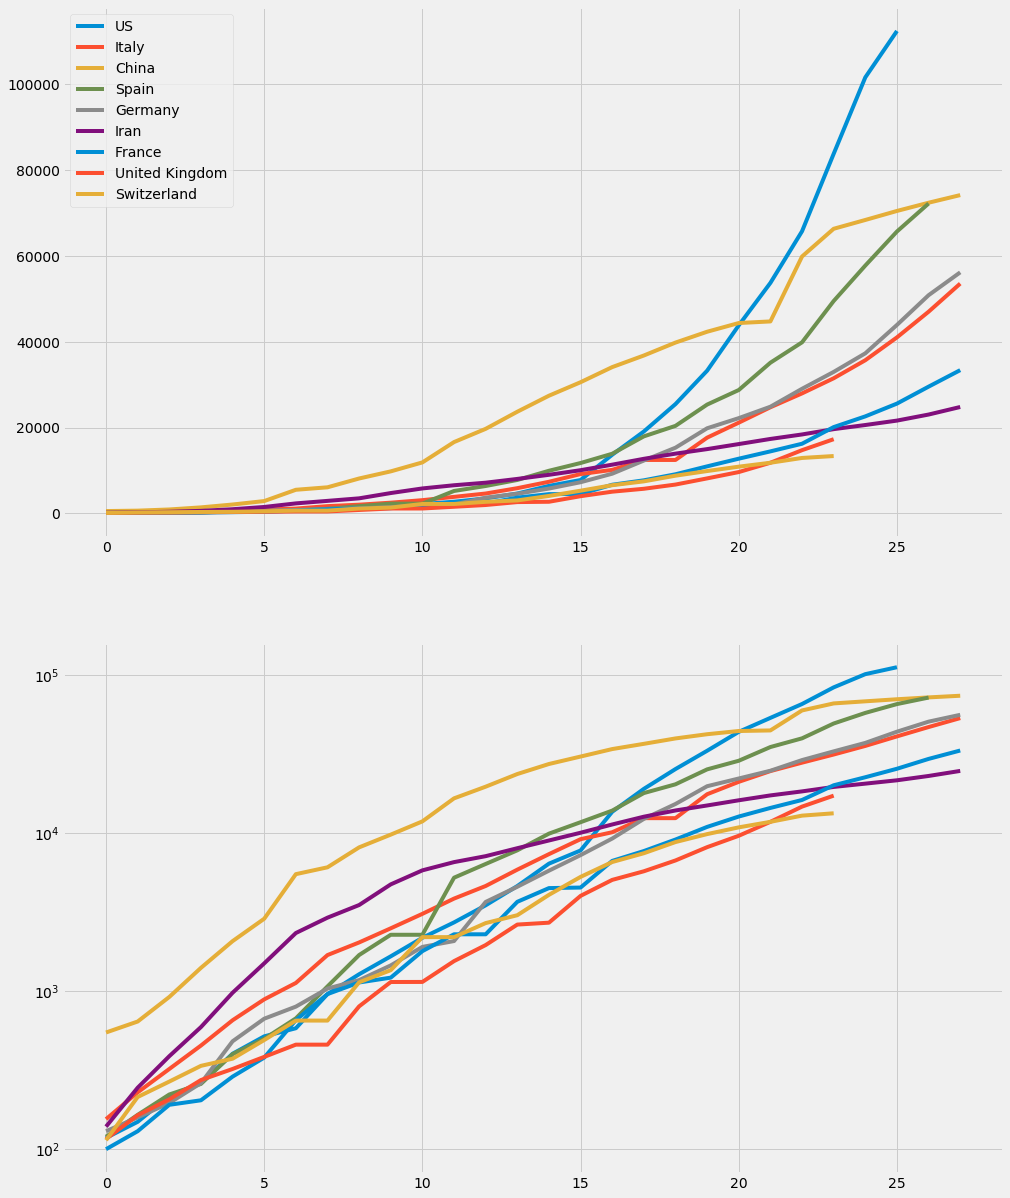

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15, 20))
fig.tight_layout()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax2.set_yscale('log')
for country in countries.index:
    ax1.plot(range(len(country_data[country]))[:28], country_data[country]['confirmed'][:28])
    ax2.plot(range(len(country_data[country]))[:28], country_data[country]['confirmed'][:28])
ax1.legend(list(countries.index), loc='upper left')